<a href="https://colab.research.google.com/github/ivanjankoski11/vnp-proekt/blob/main/VNP_Project_201105.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global News Sentiments and Economic Indicators: Utilize GDELT, IMF data, and World Bank data to explore the relationship between global news sentiments, economic indicators, and market movements.

## Import libraries



In [2]:
!pip install gdelt
!pip install country_converter
!pip install wbdata pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdelt
import requests
import io
import country_converter as coco

here


# GDELT DATA

In [3]:
gd2 = gdelt.gdelt(version=2)
gdelt_data = gd2.Search(['2018 Jan 01', '2021 Jan 01'],table='events')

/usr/local/lib/python3.10/dist-packages/gdelt/parallel.py:75: UserWarning: GDELT does not have a url for date time 20180102234500
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/gdelt/parallel.py:111: UserWarning: GDELT did not return data for date time 20180102234500
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/gdelt/parallel.py:75: UserWarning: GDELT does not have a url for date time 20180109234500
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/gdelt/parallel.py:111: UserWarning: GDELT did not return data for date time 20180109234500
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/gdelt/parallel.py:75: UserWarning: GDELT does not have a url for date time 20180222234500
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/gdelt/parallel.py:111: UserWarning: GDELT did not return data for date time 20180222234500
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/gdelt/parallel.py:75: UserW

In [ ]:
gdelt_data.columns

Index(['GLOBALEVENTID', 'SQLDATE', 'MonthYear', 'Year', 'FractionDate',
       'Actor1Code', 'Actor1Name', 'Actor1CountryCode', 'Actor1KnownGroupCode',
       'Actor1EthnicCode', 'Actor1Religion1Code', 'Actor1Religion2Code',
       'Actor1Type1Code', 'Actor1Type2Code', 'Actor1Type3Code', 'Actor2Code',
       'Actor2Name', 'Actor2CountryCode', 'Actor2KnownGroupCode',
       'Actor2EthnicCode', 'Actor2Religion1Code', 'Actor2Religion2Code',
       'Actor2Type1Code', 'Actor2Type2Code', 'Actor2Type3Code', 'IsRootEvent',
       'EventCode', 'CAMEOCodeDescription', 'EventBaseCode', 'EventRootCode',
       'QuadClass', 'GoldsteinScale', 'NumMentions', 'NumSources',
       'NumArticles', 'AvgTone', 'Actor1Geo_Type', 'Actor1Geo_FullName',
       'Actor1Geo_CountryCode', 'Actor1Geo_ADM1Code', 'Actor1Geo_ADM2Code',
       'Actor1Geo_Lat', 'Actor1Geo_Long', 'Actor1Geo_FeatureID',
       'Actor2Geo_Type', 'Actor2Geo_FullName', 'Actor2Geo_CountryCode',
       'Actor2Geo_ADM1Code', 'Actor2Geo_ADM2Code

In [4]:
columns = ['GLOBALEVENTID', 'SQLDATE', 'MonthYear', 'Year', 'FractionDate',
       'Actor1Code', 'Actor1Name', 'Actor1CountryCode', 'Actor1KnownGroupCode',
       'Actor1EthnicCode', 'Actor1Religion1Code', 'Actor1Religion2Code',
       'Actor1Type1Code', 'Actor1Type2Code', 'Actor1Type3Code', 'Actor2Code',
       'Actor2Name', 'Actor2CountryCode', 'Actor2KnownGroupCode',
       'Actor2EthnicCode', 'Actor2Religion1Code', 'Actor2Religion2Code',
       'Actor2Type1Code', 'Actor2Type2Code', 'Actor2Type3Code', 'IsRootEvent',
       'EventCode', 'CAMEOCodeDescription', 'EventBaseCode', 'EventRootCode',
       'QuadClass', 'GoldsteinScale', 'NumMentions', 'NumSources',
       'NumArticles', 'AvgTone', 'Actor1Geo_Type', 'Actor1Geo_FullName',
       'Actor1Geo_CountryCode', 'Actor1Geo_ADM1Code', 'Actor1Geo_ADM2Code',
       'Actor1Geo_Lat', 'Actor1Geo_Long', 'Actor1Geo_FeatureID',
       'Actor2Geo_Type', 'Actor2Geo_FullName', 'Actor2Geo_CountryCode',
       'Actor2Geo_ADM1Code', 'Actor2Geo_ADM2Code', 'Actor2Geo_Lat',
       'Actor2Geo_Long', 'Actor2Geo_FeatureID', 'ActionGeo_Type',
       'ActionGeo_FullName', 'ActionGeo_CountryCode', 'ActionGeo_ADM1Code',
       'ActionGeo_ADM2Code', 'ActionGeo_Lat', 'ActionGeo_Long',
       'ActionGeo_FeatureID','SOURCEURL', 'DATEADDED']

gdelt_data2 = pd.read_csv("/content/drive/MyDrive/gdelt_data.csv", header=None,names= columns ,delimiter="\t")
gdelt_data = pd.concat([gdelt_data, gdelt_data2], ignore_index=True)


In [5]:
gdelt_data.head()

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,719169281,20170101,201701,2017,2017.0027,EDU,SCHOOL,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.018010e+13,http://www.theoaklandpress.com/general-news/20...
1,719169282,20170101,201701,2017,2017.0027,UAF,GUNMEN,NaN,NaN,NaN,...,4,"Omoku, Rivers, Nigeria",NI,NI50,22794,5.3435,6.65321,-2023597,2.018010e+13,http://thenationonlineng.net/15-shot-dead-new-...
2,719169283,20170101,201701,2017,2017.0027,USA,UNITED STATES,USA,NaN,NaN,...,1,Russia,RS,RS,NaN,60.0000,100.0,RS,2.018010e+13,https://www.politico.com/story/2018/01/01/trum...
3,719169284,20171225,201712,2017,2017.9726,AGR,FARMER,NaN,NaN,NaN,...,3,"Greencastle, Pennsylvania, United States",US,USPA,PA055,39.7904,-77.7278,1176140,2.018010e+13,https://www.heraldmailmedia.com/news/tri_state...
4,719169285,20171225,201712,2017,2017.9726,AGR,FARMER,NaN,NaN,NaN,...,3,"Hosanna House, Pennsylvania, United States",US,USPA,NaN,40.4437,-79.8811,2430092,2.018010e+13,https://www.heraldmailmedia.com/news/tri_state...


In [6]:
gdelt_data.isna().sum()

GLOBALEVENTID              0
SQLDATE                    0
MonthYear                  0
Year                       0
FractionDate               0
                       ...  
ActionGeo_Lat          31777
ActionGeo_Long         31605
ActionGeo_FeatureID    31321
DATEADDED               1785
SOURCEURL                  0
Length: 62, dtype: int64

In [ ]:
gdelt_data=gdelt_data.drop(['Actor2Code',
       'Actor2Name', 'Actor2CountryCode', 'Actor2KnownGroupCode',
       'Actor2EthnicCode', 'Actor2Religion1Code', 'Actor2Religion2Code',
       'Actor2Type1Code', 'Actor2Type2Code', 'Actor2Type3Code', 'IsRootEvent','CAMEOCodeDescription','QuadClass', 'GoldsteinScale', 'NumMentions', 'NumSources',
       'NumArticles', 'AvgTone', 'Actor1Geo_Type', 'Actor1Geo_FullName',
       'Actor1Geo_CountryCode', 'Actor1Geo_ADM1Code', 'Actor1Geo_ADM2Code',
       'Actor1Geo_Lat', 'Actor1Geo_Long', 'Actor1Geo_FeatureID',
       'Actor2Geo_Type', 'Actor2Geo_FullName', 'Actor2Geo_CountryCode',
       'Actor2Geo_ADM1Code', 'Actor2Geo_ADM2Code', 'Actor2Geo_Lat',
       'Actor2Geo_Long', 'Actor2Geo_FeatureID', 'ActionGeo_Type',
       'ActionGeo_FullName', 'ActionGeo_CountryCode', 'ActionGeo_ADM1Code',
       'ActionGeo_ADM2Code', 'ActionGeo_Lat', 'ActionGeo_Long',
       'ActionGeo_FeatureID', 'DATEADDED',"Actor1KnownGroupCode"	,"Actor1EthnicCode",	"Actor1Religion1Code",	"Actor1Religion2Code",	"Actor1Type1Code",	"Actor1Type2Code",	"Actor1Type3Code"], axis = 1)

In [ ]:
gdelt_data.dropna(inplace=True)

In [7]:
gdelt_data.rename(columns={'Actor1CountryCode': 'Country Code'}, inplace=True)

In [8]:
gdelt_data["Country Code"].value_counts()

Country Code
USA    328468
GBR     33901
CAN     28335
CHN     22486
AUS     20113
        ...  
SAM         5
LAM         4
SHN         2
SCN         1
WLF         1
Name: count, Length: 218, dtype: int64

In [9]:
gdelt_data.isna().sum()

GLOBALEVENTID              0
SQLDATE                    0
MonthYear                  0
Year                       0
FractionDate               0
                       ...  
ActionGeo_Lat          31777
ActionGeo_Long         31605
ActionGeo_FeatureID    31321
DATEADDED               1785
SOURCEURL                  0
Length: 62, dtype: int64

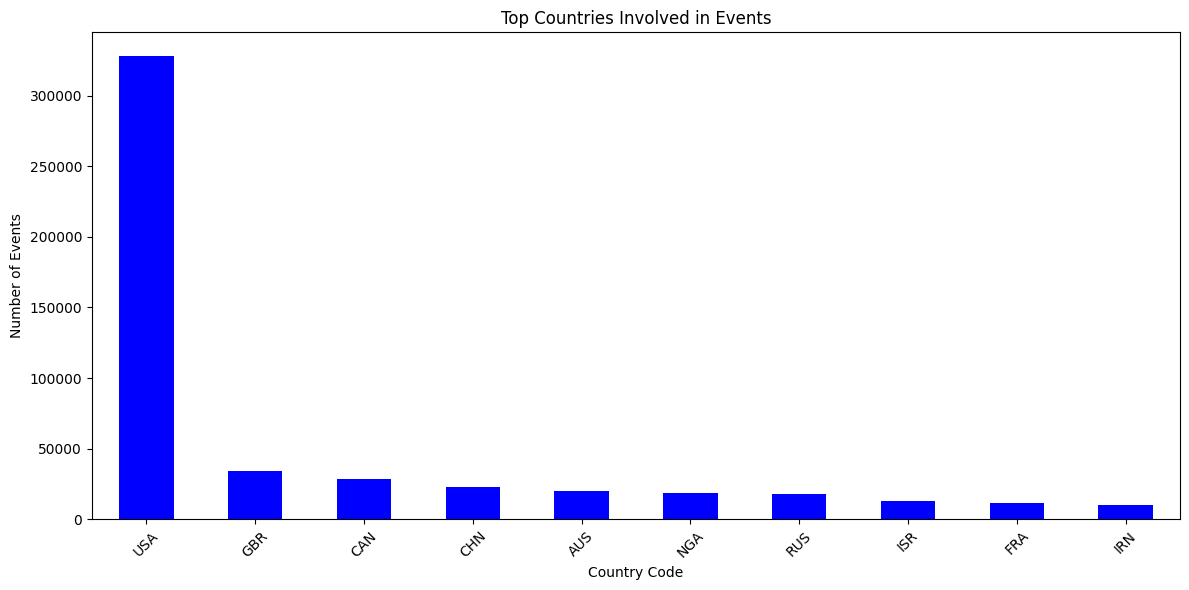

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

events_by_country = gdelt_data['Country Code'].value_counts().sort_values(ascending=False)

top_countries = events_by_country.head(10)

plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='b')
plt.title('Top Countries Involved in Events')
plt.xlabel('Country Code')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Axes: xlabel='DATEADDED'>

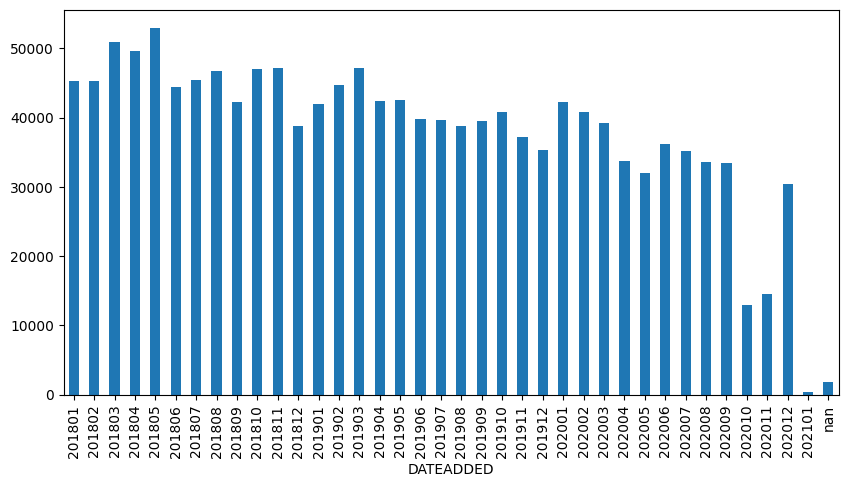

In [11]:
fig, ax = plt.subplots(figsize=(10,5))

months = gdelt_data.DATEADDED.apply(str).str[0:6]

gdelt_data.groupby(months).size().plot(kind='bar')

In [12]:
gdelt_data = gdelt_data.drop_duplicates(['SOURCEURL'])
gdelt_data.head()

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Country Code,Actor1KnownGroupCode,Actor1EthnicCode,...,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,719169281,20170101,201701,2017,2017.0027,EDU,SCHOOL,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.018010e+13,http://www.theoaklandpress.com/general-news/20...
1,719169282,20170101,201701,2017,2017.0027,UAF,GUNMEN,NaN,NaN,NaN,...,4,"Omoku, Rivers, Nigeria",NI,NI50,22794,5.3435,6.65321,-2023597,2.018010e+13,http://thenationonlineng.net/15-shot-dead-new-...
2,719169283,20170101,201701,2017,2017.0027,USA,UNITED STATES,USA,NaN,NaN,...,1,Russia,RS,RS,NaN,60.0000,100.0,RS,2.018010e+13,https://www.politico.com/story/2018/01/01/trum...
3,719169284,20171225,201712,2017,2017.9726,AGR,FARMER,NaN,NaN,NaN,...,3,"Greencastle, Pennsylvania, United States",US,USPA,PA055,39.7904,-77.7278,1176140,2.018010e+13,https://www.heraldmailmedia.com/news/tri_state...
5,719169286,20171225,201712,2017,2017.9726,CVL,POPULATION,NaN,NaN,NaN,...,2,"Connecticut, United States",US,USCT,NaN,41.5834,-72.7622,CT,2.018010e+13,http://orleans.wickedlocal.com/news/20171229/o...


In [13]:
source_url = gdelt_data["SOURCEURL"]
source_url.head()

0    http://www.theoaklandpress.com/general-news/20...
1    http://thenationonlineng.net/15-shot-dead-new-...
2    https://www.politico.com/story/2018/01/01/trum...
3    https://www.heraldmailmedia.com/news/tri_state...
5    http://orleans.wickedlocal.com/news/20171229/o...
Name: SOURCEURL, dtype: object

In [14]:
!pip install newspaper3k

In [15]:
from newspaper import Article
import pandas as pd

def getTitle(link):
    try:
        article = Article(link)
        article.download()
        article.parse()
        return article.title
    except Exception as e:
        print(f"Error downloading/parsing article: {str(e)}")
        return ""

def getArticle(link):
    try:
        article = Article(link)
        article.download()
        article.parse()
        return article.text
    except Exception as e:
        print(f"Error downloading/parsing article: {str(e)}")
        return ""

first = 500
end = 600

gdelt_data = gdelt_data.copy()

for i in range(first, end):
    print(f'Data {i+1}')

    try:
        title_data = getTitle(gdelt_data.SOURCEURL[i])
        print(f"Title: {title_data}")

        content_data = getArticle(gdelt_data.SOURCEURL[i])

        gdelt_data.loc[i, 'title'] = title_data
        gdelt_data.loc[i, 'content'] = content_data

    except KeyError:
        print(f"KeyError occurred at index {i}")
    except Exception as e:
        print(f"Error occurred at index {i}: {str(e)}")


Data 501
KeyError occurred at index 500
Data 502
KeyError occurred at index 501
Data 503
KeyError occurred at index 502
Data 504
KeyError occurred at index 503
Data 505
KeyError occurred at index 504
Data 506
KeyError occurred at index 505
Data 507
Error downloading/parsing article: Article `download()` failed with 404 Client Error: Not Found for url: https://www.latpro.com/jobs/3587063.html on URL http://www.latpro.com/jobs/3587063.html
Title: 
Error downloading/parsing article: Article `download()` failed with 404 Client Error: Not Found for url: https://www.latpro.com/jobs/3587063.html on URL http://www.latpro.com/jobs/3587063.html
Data 508
KeyError occurred at index 507
Data 509
KeyError occurred at index 508
Data 510
KeyError occurred at index 509
Data 511
KeyError occurred at index 510
Data 512
KeyError occurred at index 511
Data 513
KeyError occurred at index 512
Data 514
KeyError occurred at index 513
Data 515
KeyError occurred at index 514
Data 516
Error downloading/parsing ar

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


Title: Gov’t to oil firms: No price hike yet based on tax
Data 586
KeyError occurred at index 585
Data 587
KeyError occurred at index 586
Data 588
KeyError occurred at index 587
Data 589
KeyError occurred at index 588
Data 590
KeyError occurred at index 589
Data 591
KeyError occurred at index 590
Data 592
KeyError occurred at index 591
Data 593
KeyError occurred at index 592
Data 594
KeyError occurred at index 593
Data 595
KeyError occurred at index 594
Data 596
KeyError occurred at index 595
Data 597
KeyError occurred at index 596
Data 598
KeyError occurred at index 597
Data 599
KeyError occurred at index 598
Data 600
KeyError occurred at index 599


In [17]:
gdelt_data.head()

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Country Code,Actor1KnownGroupCode,Actor1EthnicCode,...,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL,title,content
0,719169281,20170101,201701,2017,2017.0027,EDU,SCHOOL,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.018010e+13,http://www.theoaklandpress.com/general-news/20...,NaN,NaN
1,719169282,20170101,201701,2017,2017.0027,UAF,GUNMEN,NaN,NaN,NaN,...,NI,NI50,22794,5.3435,6.65321,-2023597,2.018010e+13,http://thenationonlineng.net/15-shot-dead-new-...,NaN,NaN
2,719169283,20170101,201701,2017,2017.0027,USA,UNITED STATES,USA,NaN,NaN,...,RS,RS,NaN,60.0000,100.0,RS,2.018010e+13,https://www.politico.com/story/2018/01/01/trum...,NaN,NaN
3,719169284,20171225,201712,2017,2017.9726,AGR,FARMER,NaN,NaN,NaN,...,US,USPA,PA055,39.7904,-77.7278,1176140,2.018010e+13,https://www.heraldmailmedia.com/news/tri_state...,NaN,NaN
5,719169286,20171225,201712,2017,2017.9726,CVL,POPULATION,NaN,NaN,NaN,...,US,USCT,NaN,41.5834,-72.7622,CT,2.018010e+13,http://orleans.wickedlocal.com/news/20171229/o...,NaN,NaN


In [20]:
import pandas as pd
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')

gdelt_data['clean_content'] = gdelt_data['content'].astype(str).apply(lambda x: " ".join(x.lower() for x in x.split()))
gdelt_data['clean_content'] = gdelt_data['clean_content'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
stop_words = set(stopwords.words('english'))
gdelt_data['clean_content'] = gdelt_data['clean_content'].apply(lambda x: " ".join(x for x in word_tokenize(x) if x not in stop_words))

def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment >= 0.5:
        return 1
    else:
        return 0

gdelt_data['sentiment'] = gdelt_data['clean_content'].apply(get_sentiment)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


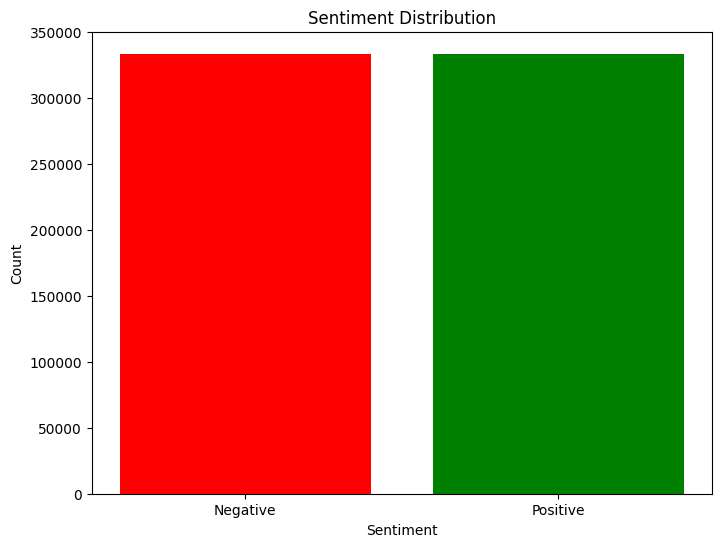

In [21]:
sentiment_counts = gdelt_data['sentiment'].value_counts()
sentiment_labels = ['Negative', 'Positive']

plt.figure(figsize=(8, 6))
plt.bar(sentiment_labels, sentiment_counts, color=['red', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

# WORLD BANK DATA

In [ ]:
wb_data = pd.read_csv("/content/drive/MyDrive/wb_data.csv")
wb_data.head()

,Series Name,Series Code,Country Name,Country Code,2017,2018,2019,2020,2021,2022,2023
0,GDP (current US$),NY.GDP.MKTP.CD,Afghanistan,AFG,18753456498,18053222687,18799444490,19955929052,14266499430,14502158192,..
1,GDP (current US$),NY.GDP.MKTP.CD,Albania,ALB,13019726212,15156424015,15401826127,15162734205,17930565119,18916378861,22977677861
2,GDP (current US$),NY.GDP.MKTP.CD,Algeria,DZA,189880896903,194554483656,193459662091,164873415325,186265418571,225560256622,239899491128
3,GDP (current US$),NY.GDP.MKTP.CD,American Samoa,ASM,612000000,639000000,647000000,721000000,750000000,871000000,..
4,GDP (current US$),NY.GDP.MKTP.CD,Andorra,AND,3000162081,3218419897,3155149348,2891001149,3324683012,3380602043,3727673593


In [ ]:
wb_data.isna().sum()

Series Name     3
Series Code     5
Country Name    5
Country Code    5
2017            5
2018            5
2019            5
2020            5
2021            5
2022            5
2023            5
dtype: int64

In [ ]:
wb_data.dropna(inplace=True)

In [ ]:
wb_data.isna().sum()

Series Name     0
Series Code     0
Country Name    0
Country Code    0
2017            0
2018            0
2019            0
2020            0
2021            0
2022            0
2023            0
dtype: int64

In [ ]:
wb_data = wb_data.melt(id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'],
                               var_name='Year', value_name='Value')
wb_data['Year'] = wb_data['Year'].astype(int)
wb_data['Value'] = pd.to_numeric(wb_data['Value'], errors='coerce')

wb_data.head()

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,2017,1.875346e+10
1,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,2017,1.301973e+10
2,Algeria,DZA,GDP (current US$),NY.GDP.MKTP.CD,2017,1.898809e+11
3,American Samoa,ASM,GDP (current US$),NY.GDP.MKTP.CD,2017,6.120000e+08
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,2017,3.000162e+09


<ipython-input-151-db8d8479982a>:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


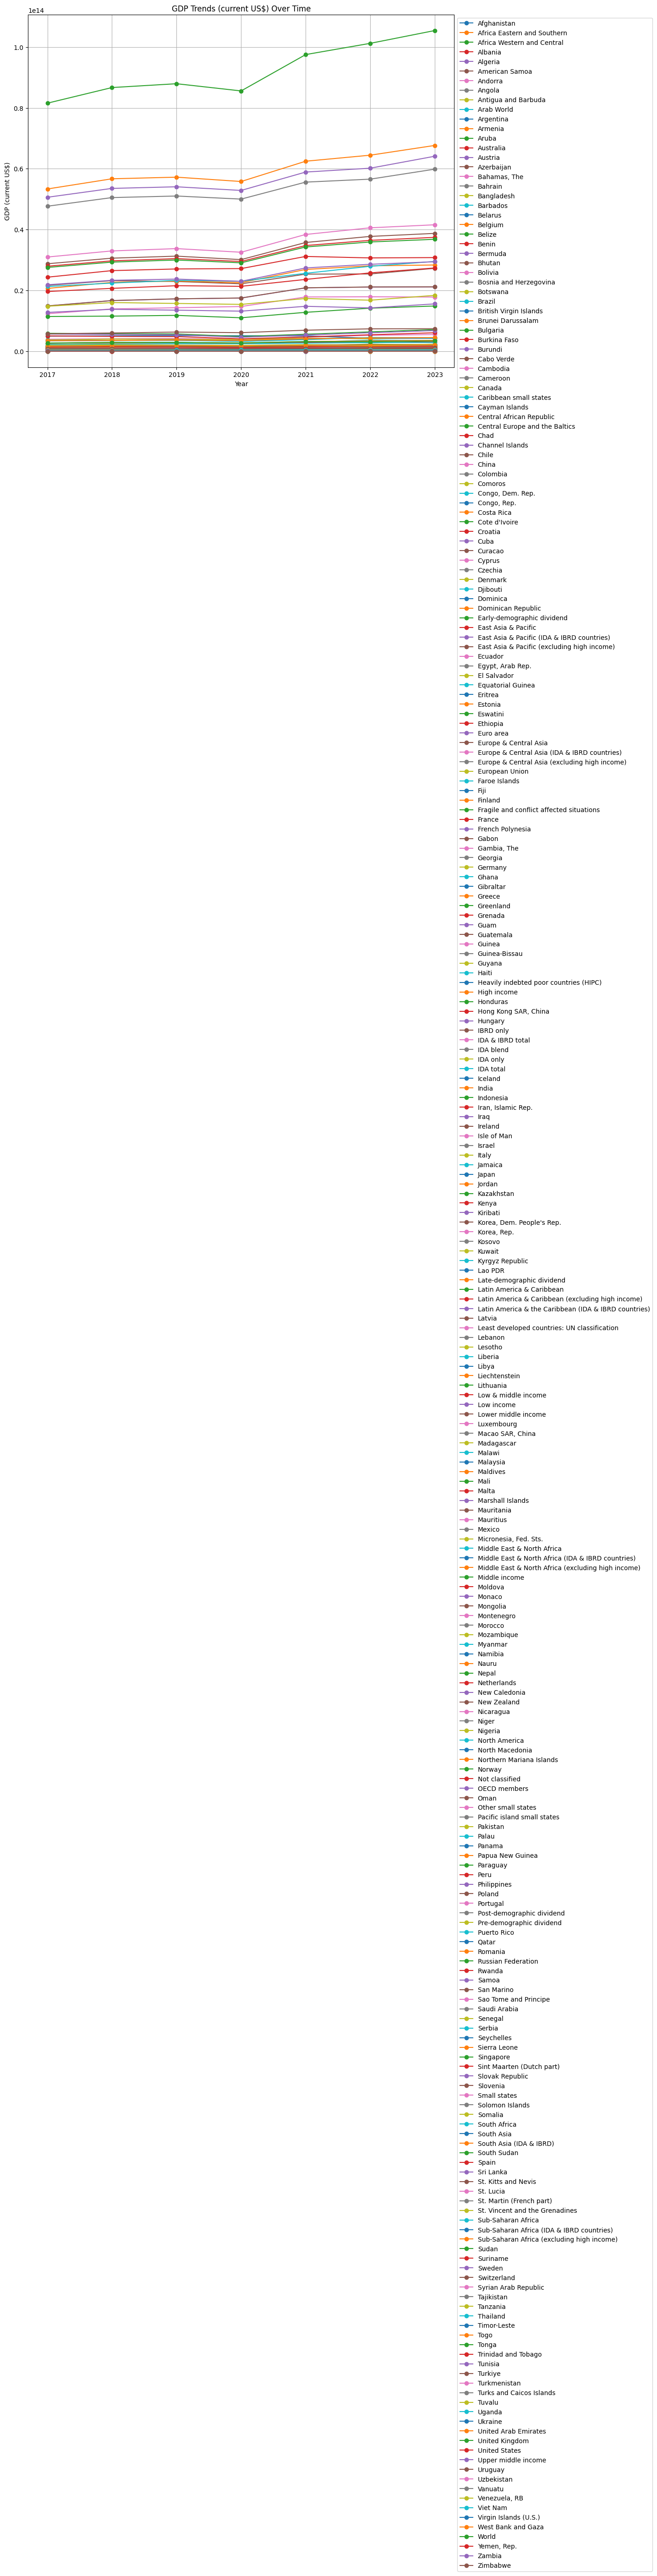

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

gdp_data = wb_data[wb_data['Series Code'] == 'NY.GDP.MKTP.CD']

gdp_pivot = gdp_data.pivot(index='Year', columns='Country Name', values='Value')

plt.figure(figsize=(12, 10))
for country in gdp_pivot.columns:
    plt.plot(gdp_pivot.index, gdp_pivot[country], marker='o', label=country)

plt.title('GDP Trends (current US$) Over Time')
plt.xlabel('Year')
plt.ylabel('GDP (current US$)')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


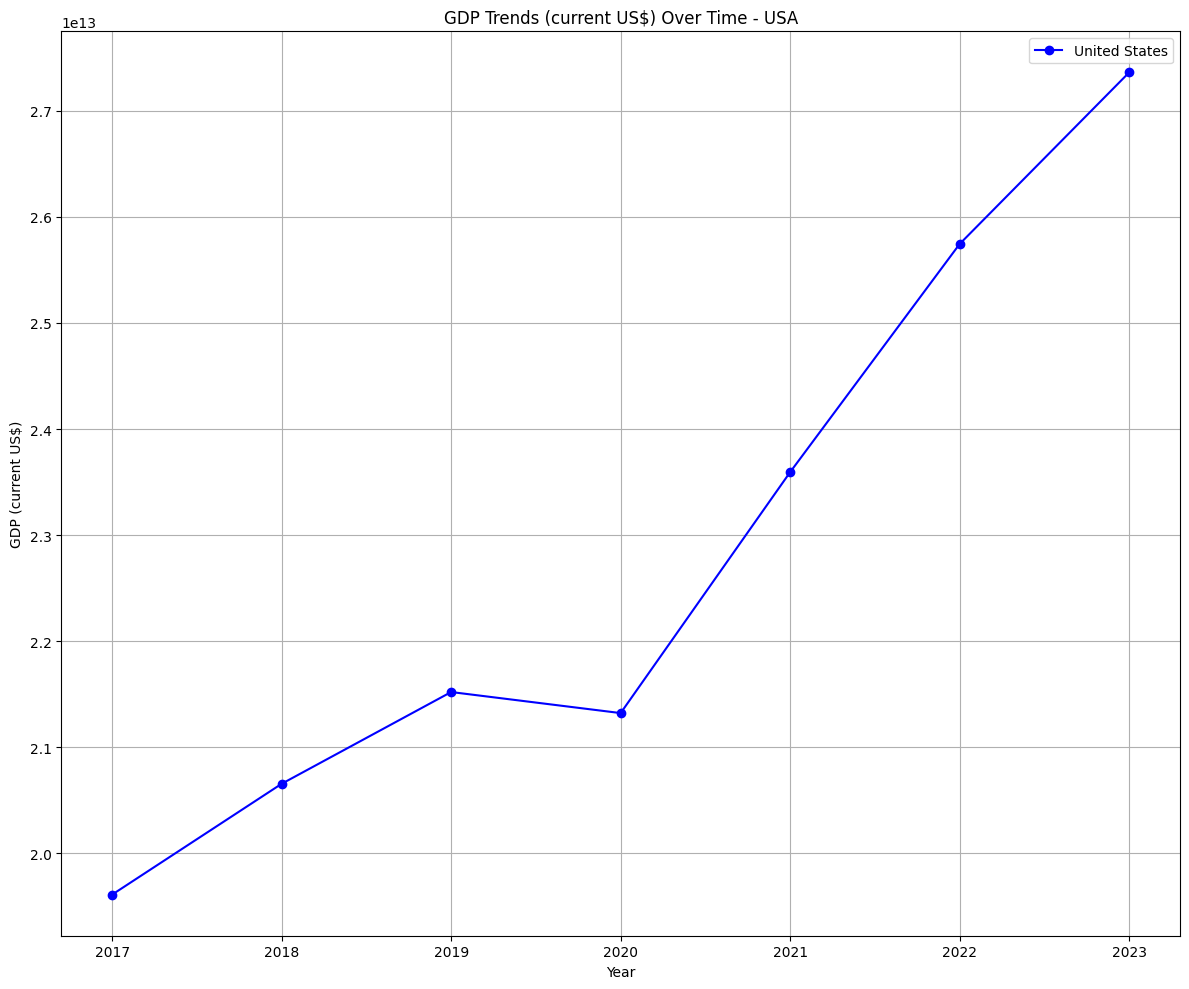

In [ ]:
gdp_data_usa = wb_data[(wb_data['Country Name'] == 'United States') & (wb_data['Series Code'] == 'NY.GDP.MKTP.CD')]

gdp_pivot_usa = gdp_data_usa.pivot(index='Year', columns='Country Name', values='Value')

plt.figure(figsize=(12, 10))
plt.plot(gdp_pivot_usa.index, gdp_pivot_usa['United States'], marker='o', linestyle='-', color='b', label='United States')

plt.title('GDP Trends (current US$) Over Time - USA')
plt.xlabel('Year')
plt.ylabel('GDP (current US$)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


# IMF DATA

In [ ]:
imf_data = pd.read_csv("/content/drive/MyDrive/imf-anual.csv")
imf_data.head()

,Country,2017,2018,2019,2020,2021,2022,2023
0,"Afghanistan, Islamic Rep. of",...,...,"1,505,967.42","1,534,965.53","1,251,171.76",...,...
1,Albania,"1,550,645.49","1,636,731.32","1,691,903.43","1,647,431.07","1,856,172.26","2,138,339.13","2,312,588.39"
2,Algeria,"21,071,700.00","22,683,800.00","23,090,100.00","20,902,100.00","25,157,800.00","32,028,400.00",...
3,"Andorra, Principality of","2,655.76","2,725.27","2,818.42","2,531.09","2,810.97","3,187.50",...
4,Angola,"20,262,300.00","25,627,742.12","30,330,429.40","31,700,770.74","44,141,400.80","53,019,236.19",...


In [ ]:
imf_data['Country Code'] = coco.convert(names=imf_data['Country'], to='ISO3', not_found=None)

In [ ]:
imf_data = imf_data[~imf_data['Country Code'].apply(lambda x: isinstance(x, list))]
is_list = imf_data['Country Code'].apply(lambda x: isinstance(x, list))

imf_data['Country Code'] = imf_data['Country Code'].apply(lambda x: x[0] if isinstance(x, list) else x)

<ipython-input-155-2205b84d9485>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imf_data['Country Code'] = imf_data['Country Code'].apply(lambda x: x[0] if isinstance(x, list) else x)


In [ ]:
imf_data = pd.melt(imf_data, id_vars=['Country', 'Country Code'],
                            var_name='Year', value_name='Value')
imf_data['Year'] = pd.to_numeric(imf_data['Year'], errors='coerce', downcast='integer')
imf_data.head()

,Country,Country Code,Year,Value
0,"Afghanistan, Islamic Rep. of",AFG,2017,...
1,Albania,ALB,2017,"1,550,645.49"
2,Algeria,DZA,2017,"21,071,700.00"
3,"Andorra, Principality of",AND,2017,"2,655.76"
4,Angola,AGO,2017,"20,262,300.00"


In [ ]:
imf_data.isna().sum()

Country         0
Country Code    0
Year            0
Value           0
dtype: int64

<ipython-input-158-6c5ebd121d8c>:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


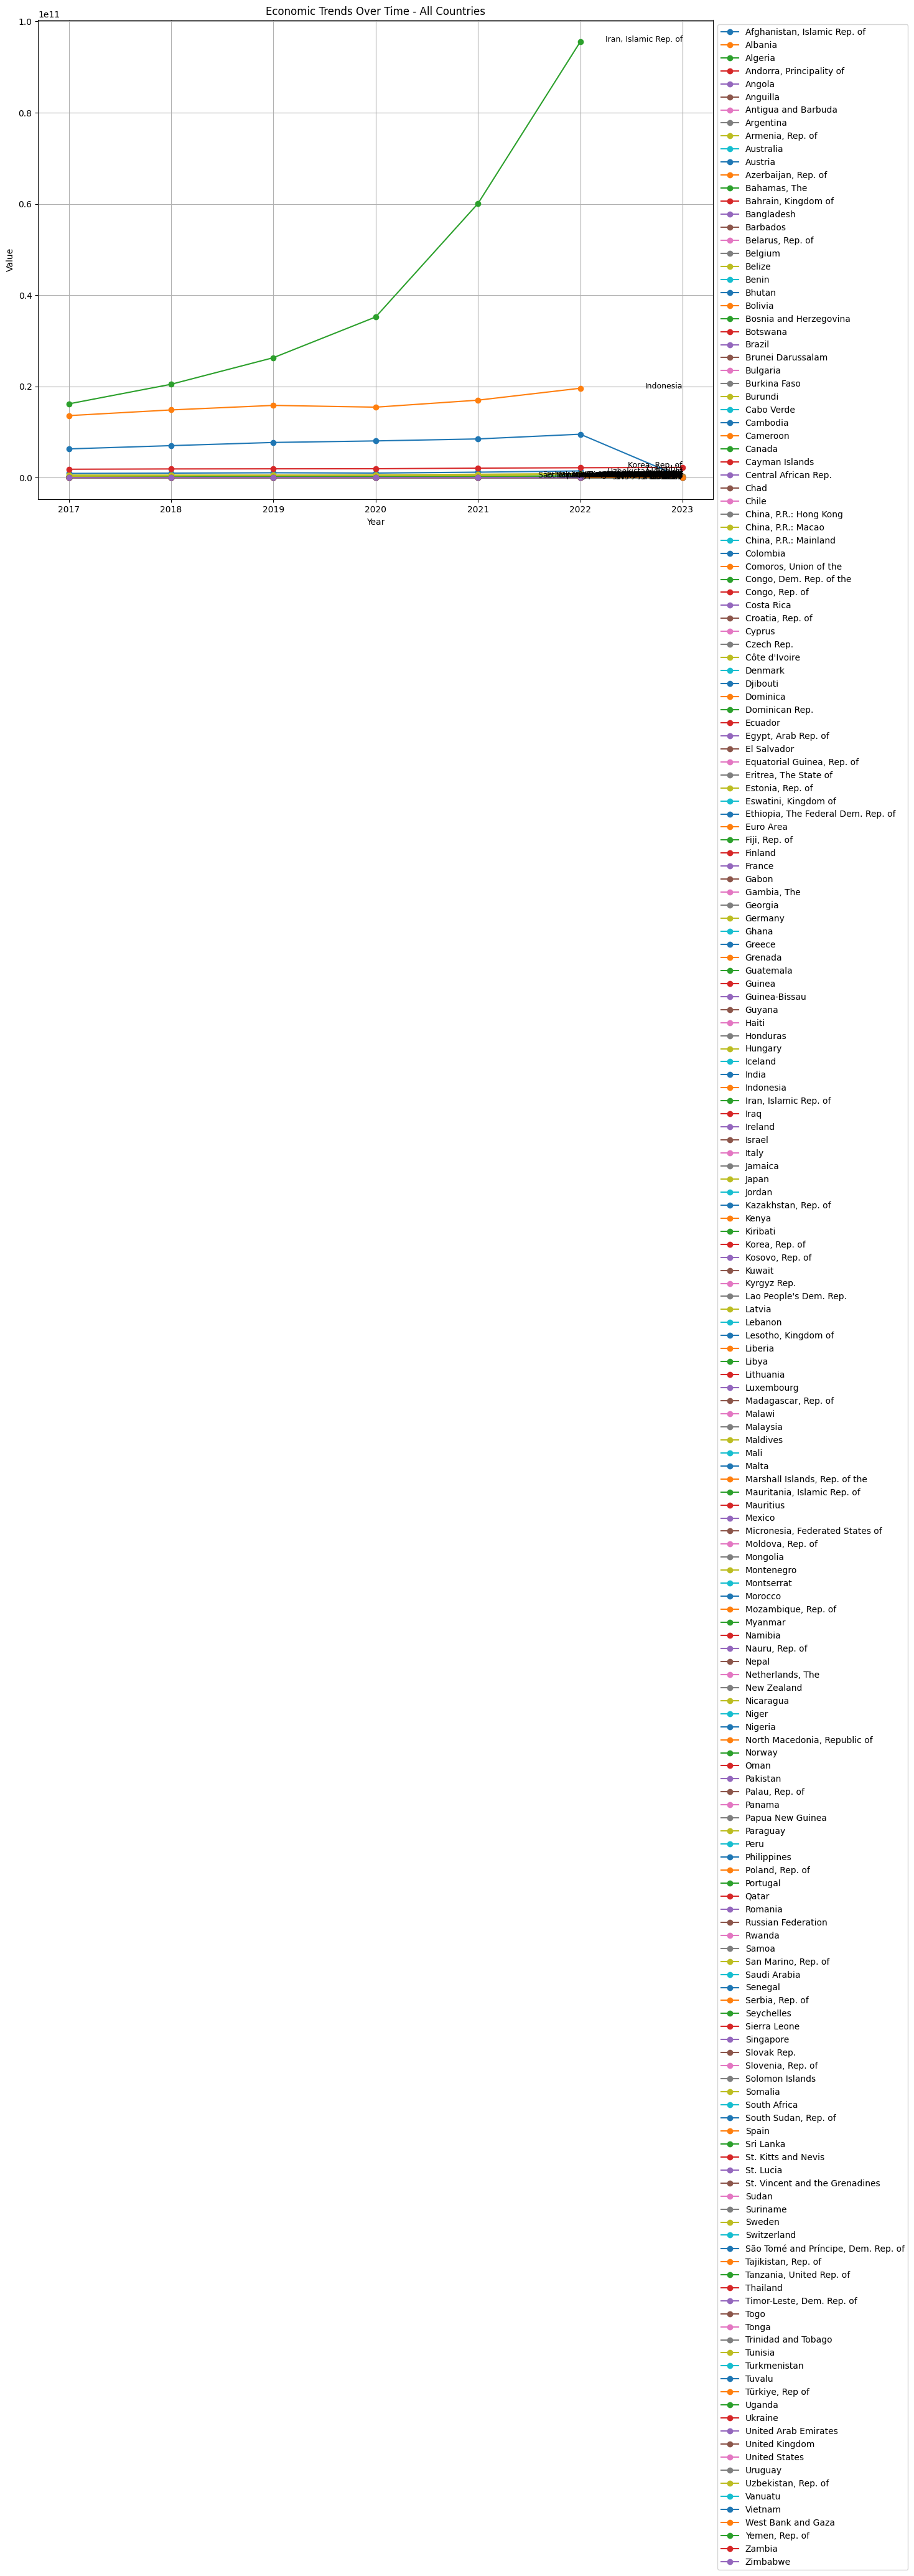

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

imf_data['Value'] = pd.to_numeric(imf_data['Value'].str.replace(',', ''), errors='coerce')

imf_pivot = imf_data.pivot(index='Year', columns='Country', values='Value')

plt.figure(figsize=(14, 10))
for country in imf_pivot.columns:
    plt.plot(imf_pivot.index, imf_pivot[country], marker='o', label=country)
    plt.text(imf_pivot.index[-1], imf_pivot[country].dropna().iloc[-1], country, fontsize=9, ha='right')

plt.title('Economic Trends Over Time - All Countries')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


# MERGING THE THREE DATASETS

In [ ]:
merged_data = pd.merge(gdelt_data, imf_data, on=["Country Code", "Year"], how="inner")
merged_data = pd.merge(merged_data, wb_data, on=['Country Code', 'Year'], how='inner')
merged_data.rename(columns={'Value_x': 'WB_GDP', 'Value_y': 'IMF_GDP'}, inplace=True)
merged_data

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Country Code,EventCode,EventBaseCode,EventRootCode,SOURCEURL,Country,WB_GDP,Country Name,Series Name,Series Code,IMF_GDP
0,932289160,20190701,201907,2019,2019.4959,CHN,CHINESE,CHN,051,051,05,https://theprovince.com/news/canada-should-off...,"China, P.R.: Mainland",98651520.0,China,GDP (current US$),NY.GDP.MKTP.CD,1.427997e+13
1,932289161,20190701,201907,2019,2019.4959,CHN,CHINESE,CHN,051,051,05,https://theprovince.com/news/canada-should-off...,"China, P.R.: Mainland",98651520.0,China,GDP (current US$),NY.GDP.MKTP.CD,1.427997e+13
2,932289162,20190701,201907,2019,2019.4959,CHN,CHINESE,CHN,111,111,11,https://theprovince.com/news/canada-should-off...,"China, P.R.: Mainland",98651520.0,China,GDP (current US$),NY.GDP.MKTP.CD,1.427997e+13
3,932289163,20190701,201907,2019,2019.4959,CHN,CHINESE,CHN,111,111,11,https://theprovince.com/news/canada-should-off...,"China, P.R.: Mainland",98651520.0,China,GDP (current US$),NY.GDP.MKTP.CD,1.427997e+13
4,932289164,20190701,201907,2019,2019.4959,CHN,CHINESE,CHN,111,111,11,https://theprovince.com/news/canada-should-off...,"China, P.R.: Mainland",98651520.0,China,GDP (current US$),NY.GDP.MKTP.CD,1.427997e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79505,1186249933,20230710,202307,2023,2023.5205,ISR,ISRAEL,ISR,256,2,1,https://www.rnz.co.nz/programmes/the-detail/st...,Israel,NaN,Israel,GDP (current US$),NY.GDP.MKTP.CD,5.099015e+11
79506,1186249937,20230710,202307,2023,2023.5205,MNCJPN,SONY,JPN,84,8,2,https://www.psu.com/news/ps5-tops-uk-console-s...,Japan,NaN,Japan,GDP (current US$),NY.GDP.MKTP.CD,4.212945e+12
79507,1186249938,20230710,202307,2023,2023.5205,SDN,SUDANESE,SDN,42,4,1,https://www.democracynow.org/2024/7/9/headline...,Sudan,NaN,Sudan,GDP (current US$),NY.GDP.MKTP.CD,1.093270e+11
79508,1186249939,20230710,202307,2023,2023.5205,USA,UNITED STATES,USA,43,4,1,https://bigfoot99.com/bigfoot99-news/us-air-fo...,United States,27356393.0,United States,GDP (current US$),NY.GDP.MKTP.CD,2.736094e+13


In [ ]:
merged_data.dropna(inplace=True)

<ipython-input-169-70c99ce040c2>:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


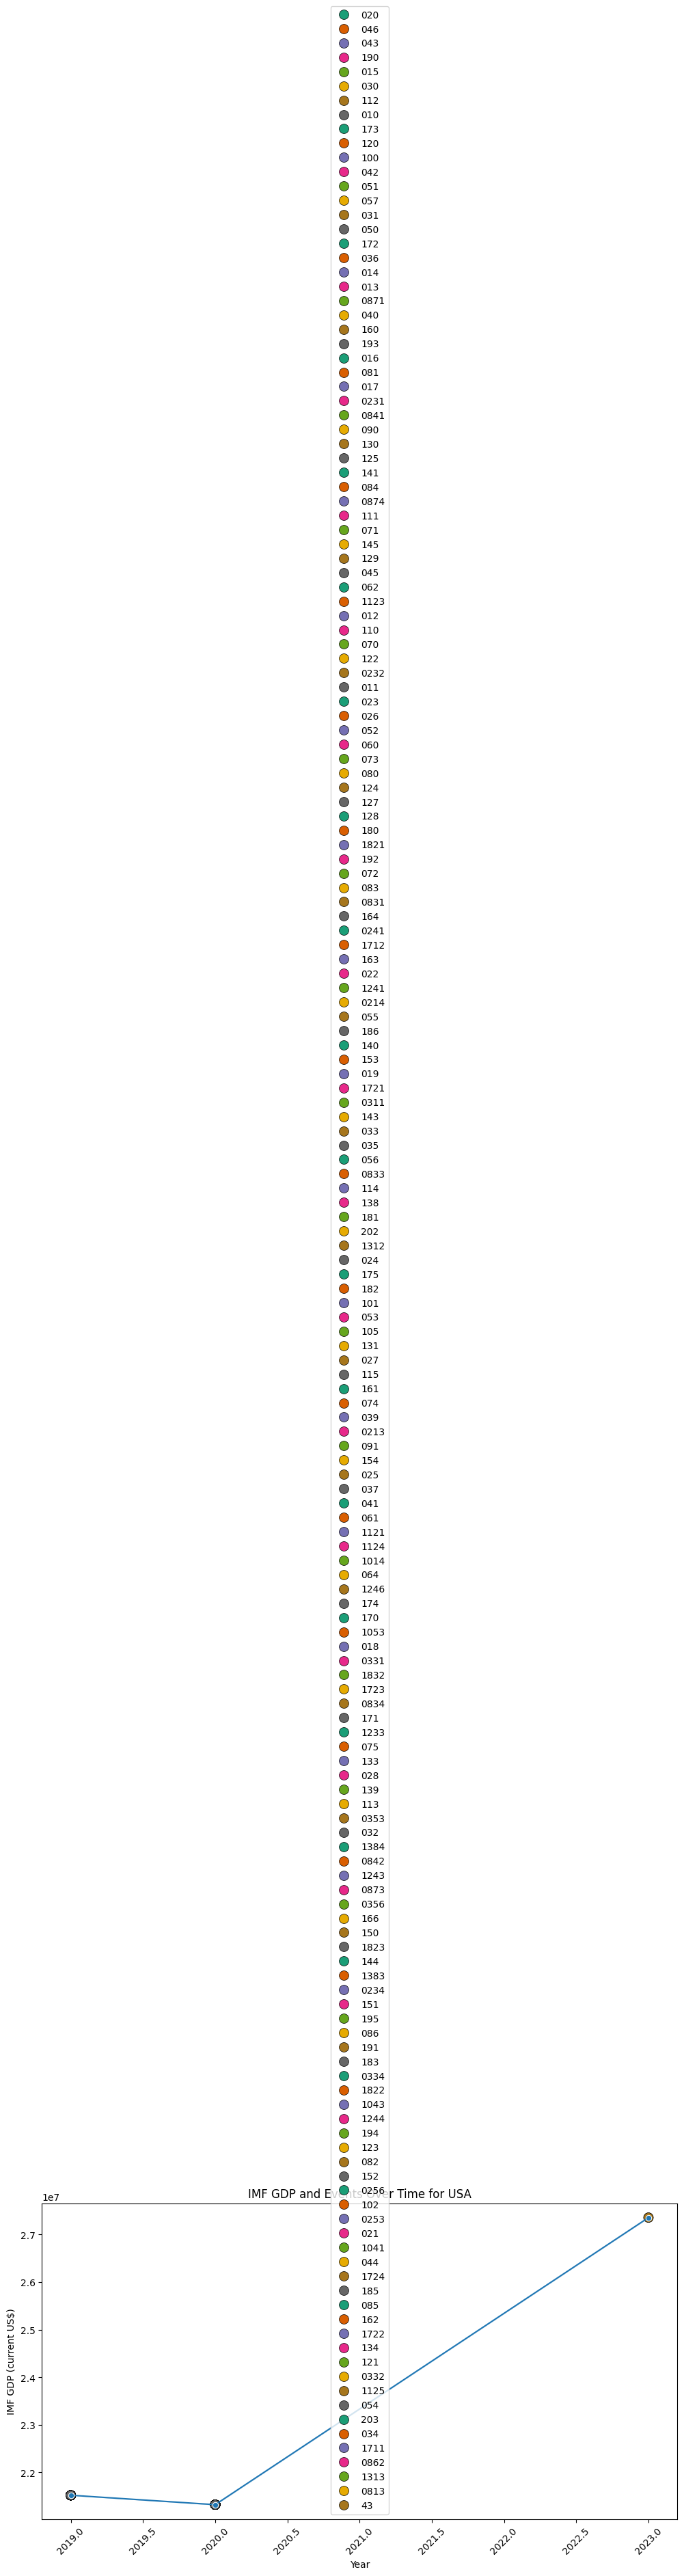

In [ ]:
usa_gdelt_data = gdelt_data[gdelt_data['Country Code'] == 'USA']
usa_merged_data = merged_data[merged_data['Country Code'] == 'USA']
usa_event_count_per_year = usa_gdelt_data.groupby('Year').size().reset_index(name='Event Count')

plt.figure(figsize=(12, 6))

sns.lineplot(x='Year', y='WB_GDP', data=usa_merged_data, marker='o')
sns.scatterplot(x='Year', y='WB_GDP', hue='EventCode', data=usa_merged_data, palette='Dark2', s=100, edgecolor='k', linewidth=0.5)

plt.xlabel('Year')
plt.ylabel('IMF GDP (current US$)')
plt.title('IMF GDP and Events Over Time for USA')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
